In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd

data = fetch_california_housing(as_frame=True)
df = data.frame

X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_test_data = {
    "Train size": [X_train.shape, y_train.shape],
    "Test size": [X_test.shape, y_test.shape]
}

train_test_df = pd.DataFrame(train_test_data, index=["Features", "Target"])
print(train_test_df)

          Train size  Test size
Features  (14448, 8)  (6192, 8)
Target      (14448,)    (6192,)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2 Score: {r2}")

MSE: 0.5305677824766755
R^2 Score: 0.5957702326061662


In [6]:
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

if train_r2 > test_r2:
    print("Модель перенавчена, оскільки точність на навчальних даних значно вища.")
else:
    print("Модель не перенавчена.")

Модель перенавчена, оскільки точність на навчальних даних значно вища.


In [8]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
import numpy as np
alpha_values = [0.1, 1, 10, 100]

def test_model_with_regularization(Model, alpha_values):
    for alpha in alpha_values:
        model = Model(alpha=alpha)
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        mean_cv_score = np.mean(cv_scores)
        print(f"{Model.__name__} (alpha={alpha}): Average R^2 Score = {mean_cv_score}")

print("Ridge Regression:")
test_model_with_regularization(Ridge, alpha_values)

print("\nLasso Regression:")
test_model_with_regularization(Lasso, alpha_values)

Ridge Regression:
Ridge (alpha=0.1): Average R^2 Score = 0.6065836975593946
Ridge (alpha=1): Average R^2 Score = 0.6065828573275425
Ridge (alpha=10): Average R^2 Score = 0.6065630760172891
Ridge (alpha=100): Average R^2 Score = 0.6056900920604129

Lasso Regression:
Lasso (alpha=0.1): Average R^2 Score = 0.5455220092181989
Lasso (alpha=1): Average R^2 Score = 0.2875001048607496
Lasso (alpha=10): Average R^2 Score = -0.00012152834446852446
Lasso (alpha=100): Average R^2 Score = -0.0006416906415077417


In [9]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

y_train_pred = ridge_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Train Mean Squared Error (MSE): {train_mse}")
print(f"Train R^2 Score: {train_r2}")
print(f"Test Mean Squared Error (MSE): {test_mse}")
print(f"Test R^2 Score: {test_r2}")

Train Mean Squared Error (MSE): 0.5233576299656519
Train R^2 Score: 0.6093459719471153
Test Mean Squared Error (MSE): 0.5305615027470351
Test R^2 Score: 0.5957750170158791


MSE як і R^2 на тестовій вибірці майже не змінився. Відповідно хоч і ввеедна регуляризація через рідж регрешн допомогла стабілізувати модель, але не мала сильного впливу через хороший баланс моделі ще до регуляризації.

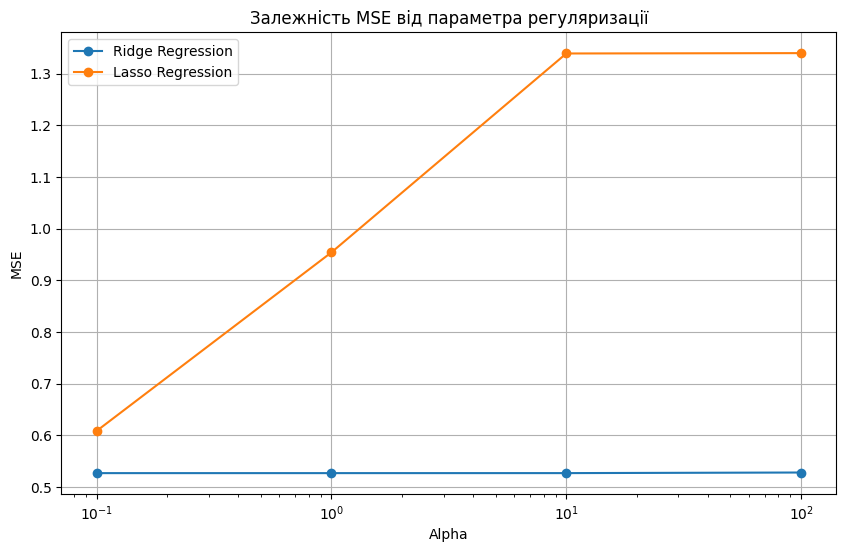

In [16]:
import matplotlib.pyplot as plt
def calculate_cv_mse(Model, alpha_values):
    mse_values = []
    for alpha in alpha_values:
        model = Model(alpha=alpha)
        mse = -np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
        mse_values.append(mse)
    return mse_values
    
ridge_mse_values = calculate_cv_mse(Ridge, alpha_values)
lasso_mse_values = calculate_cv_mse(Lasso, alpha_values)

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, ridge_mse_values, label='Ridge Regression', marker='o')
plt.plot(alpha_values, lasso_mse_values, label='Lasso Regression', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Залежність MSE від параметра регуляризації')
plt.legend()
plt.grid(True)
plt.show()

Ridge Regression з α=0.1 покращила стабільність моделі, запобігши перенавчанню, без значної втрати точності. Lasso виявилася менш ефективною.

Завдання 2

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

data = fetch_california_housing(as_frame=True).frame
X = data.drop(columns=["MedHouseVal"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

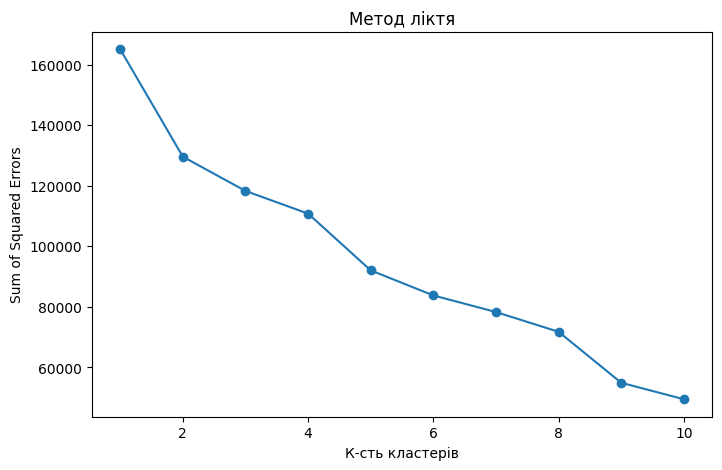

In [25]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('К-сть кластерів')
plt.ylabel('Sum of Squared Errors')
plt.title('Метод ліктя')
plt.show()


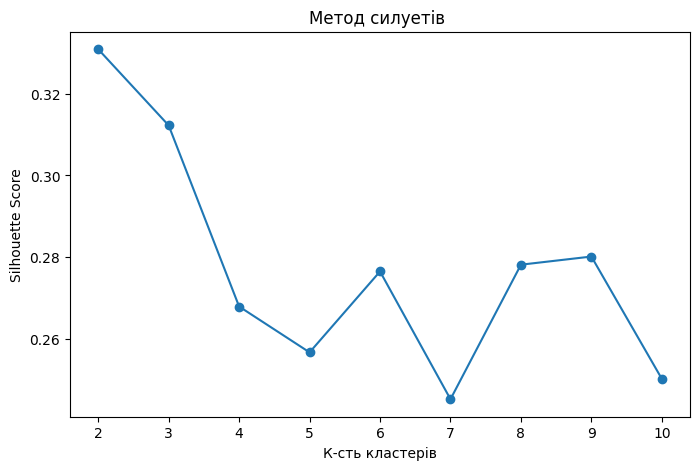

In [26]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('К-сть кластерів')
plt.ylabel('Silhouette Score')
plt.title('Метод силуетів ')
plt.show()

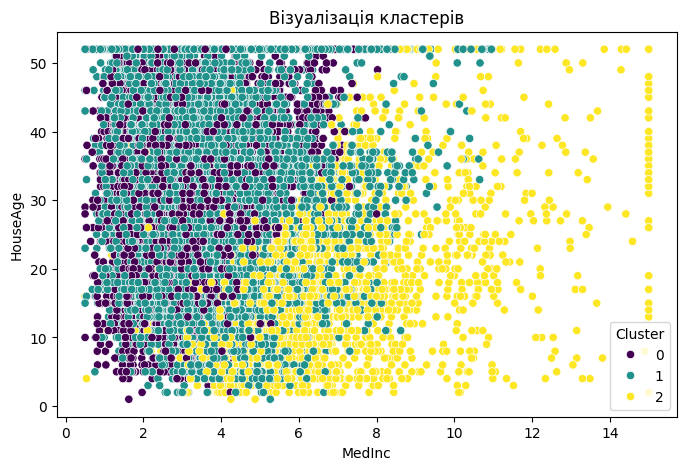

In [27]:
optimal_clusters = 3  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=data['Cluster'], palette='viridis')
plt.title('Візуалізація кластерів')
plt.show()